In [1]:
import xml.etree.ElementTree as ET
from skimage.draw import polygon
import nibabel as nib
import numpy as np

In [2]:
file_xml = '/home/johnsonj118/Jkb01_001_008_A-2-22-16-ax ssfse liver.xml'
imshape = (512,512)

In [9]:
import xmltodict

with open(file_xml) as f:
    doc = xmltodict.parse(f.read())

In [10]:
doc

OrderedDict([('plist',
              OrderedDict([('@version', '1.0'),
                           ('dict',
                            OrderedDict([('key', 'Images'),
                                         ('array',
                                          OrderedDict([('dict',
                                                        [OrderedDict([('key',
                                                                       ['ImageHeight',
                                                                        'ImageIndex',
                                                                        'ImageTotalNum',
                                                                        'ImageWidth',
                                                                        'NumberOfROIs',
                                                                        'ROIs']),
                                                                      ('integer',
                                        

In [4]:
roi_list = doc['plist']['dict']['array']['dict']

In [18]:
roi_list[1]

OrderedDict([('key',
              ['ImageHeight',
               'ImageIndex',
               'ImageTotalNum',
               'ImageWidth',
               'NumberOfROIs',
               'ROIs']),
             ('integer', ['512', '7', '30', '512', '1']),
             ('array',
              OrderedDict([('dict',
                            OrderedDict([('key',
                                          ['AreaCm2',
                                           'AreaPix2',
                                           'Center',
                                           'Dev',
                                           'IndexInImage',
                                           'LengthCm',
                                           'LengthPix',
                                           'Max',
                                           'Mean',
                                           'Min',
                                           'Name',
                                           'NumberOfP

In [11]:
imshape = (int(roi_list[0]['integer'][0]),int(roi_list[0]['integer'][3]))

In [43]:
cur_roi = roi_list[1]
roi_ind = cur_roi['integer'][1]
x = cur_roi['array']['dict']['array'][1]['string']

In [44]:
x

['(183.060959, 193.635551)',
 '(207.054134, 201.437767)',
 '(214.205028, 244.109548)',
 '(195.129158, 256.118073)',
 '(167.011513, 266.897272)',
 '(136.653450, 243.391731)',
 '(151.698639, 219.078006)']

In [45]:
from ast import literal_eval
coords = [literal_eval(coord) for coord in x]

In [46]:
coords

[(183.060959, 193.635551),
 (207.054134, 201.437767),
 (214.205028, 244.109548),
 (195.129158, 256.118073),
 (167.011513, 266.897272),
 (136.65345, 243.391731),
 (151.698639, 219.078006)]

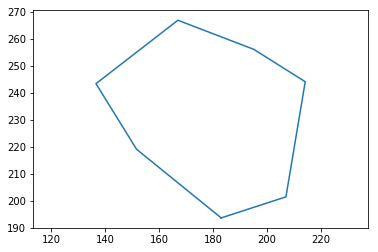

In [52]:
from matplotlib import pyplot as plt
x = [i[0] for i in coords] + [coords[0][0]]
y = [i[1] for i in coords] + [coords[0][1]]
plt.figure()
plt.axes().set_aspect('equal','datalim')
plt.plot(x,y)
plt.show()

In [72]:
dcm_path = '/home/johnsonj118/deep-learning/LiverSegmentation/*'

In [54]:
from glob import glob

In [73]:
dirs = glob(dcm_path)

In [74]:
dirs

['/home/johnsonj118/deep-learning/LiverSegmentation/ReadXML.ipynb',
 '/home/johnsonj118/deep-learning/LiverSegmentation/ReadXML.py',
 '/home/johnsonj118/deep-learning/LiverSegmentation/untitled']